In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Version:  0.0.25


In [26]:
def get_square(arr,index,shape,locations=None):
    import json
    
    if locations is None:
        with open('locations.json') as json_file:
            locations = json.load(json_file)        
    
    try:
        location=locations[index]
    except IndexError:
        print("locations.json file probably corrupt.")
        raise 
        
    c,r=location
    c1=int(c-shape[1]/2)
    c2=int(c+shape[1]/2)
    r1=int(r-shape[0]/2)
    r2=int(r+shape[0]/2)

    c2=c2+(shape[1]-(c2-c1))
    r2=r2+(shape[0]-(r2-r1))

    square=arr[r1:r2,c1:c2,:]
    
    return square


In [27]:
images=image.load_images('/Users/bblais/Desktop/ai373/images/board images/squares')
shape=images.data[0].shape[:2]
data_train=data=image.images_to_vectors(images,verbose=True)  # train on all of them

classifier=NaiveBayes()
timeit(reset=True)
classifier.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

[black]: 58 files found
[red]: 56 files found
[white]: 46 files found
160 vectors of length 4800
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p4795', 'p4796', 'p4797', 'p4798', 'p4799'  (4800 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [181.69375 181.98125 173.61875 ... 182.34375 184.975   176.9125 ]
Median:  [184. 188. 179. ... 184. 188. 181.]
Stddev:  [19.17745971 25.58257998 25.00971608 ... 10.69582096 17.79569822
 17.12869942]
Time Reset
Training time:  0.01024484634399414 seconds 


## prototypes for naive bayes

In [28]:
classifier.means

array([[179.56896552, 181.75862069, 175.65517241, ..., 186.46551724,
        188.29310345, 181.48275862],
       [182.89285714, 177.80357143, 169.41071429, ..., 177.91071429,
        179.80357143, 172.35714286],
       [182.91304348, 187.34782609, 176.17391304, ..., 182.54347826,
        187.08695652, 176.69565217]])

In [29]:
classifier.means.shape

(3, 4800)

Text(0.5, 1.0, 'red')

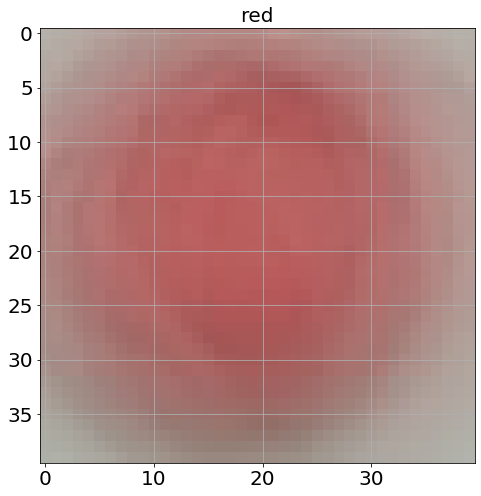

In [30]:
target='red'
target_index=images['target_names'].index(target)
shape_3d=list(shape)+[3]
imshow(classifier.means[target_index,:].reshape(shape_3d)/255)
title(target)

Text(0.5, 1.0, 'black')

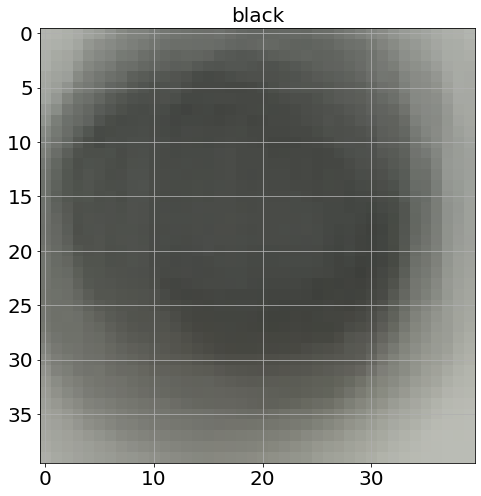

In [32]:
target='black'
target_index=images['target_names'].index(target)
shape_3d=list(shape)+[3]
imshow(classifier.means[target_index,:].reshape(shape_3d)/255)
title(target)

## Perceptron

In [34]:
images=image.load_images('/Users/bblais/Desktop/ai373/images/board images/squares')
shape=images.data[0].shape[:2]
data_train=data=image.images_to_vectors(images,verbose=True)  # train on all of them

classifier=Perceptron()
timeit(reset=True)
classifier.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

[black]: 58 files found
[red]: 56 files found
[white]: 46 files found
160 vectors of length 4800
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p4795', 'p4796', 'p4797', 'p4798', 'p4799'  (4800 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [181.69375 181.98125 173.61875 ... 182.34375 184.975   176.9125 ]
Median:  [184. 188. 179. ... 184. 188. 181.]
Stddev:  [19.17745971 25.58257998 25.00971608 ... 10.69582096 17.79569822
 17.12869942]
Time Reset
Training time:  0.02232193946838379 seconds 


In [35]:
classifier.weights

array([[1011., 1062., 1018., ..., 1246., 1310., 1248.],
       [ -39., -360., -310., ..., -332., -387., -350.],
       [-745., -671., -693., ..., -703., -619., -625.]])

In [36]:
classifier.weights.shape

(3, 4800)

Text(0.5, 1.0, 'red')

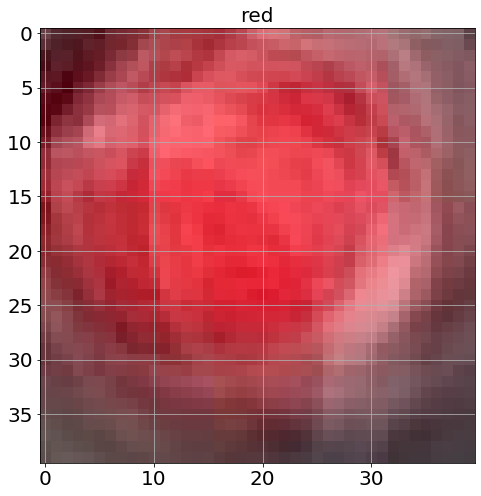

In [40]:
target='red'
target_index=images['target_names'].index(target)
shape_3d=list(shape)+[3]
im=classifier.weights[target_index,:].reshape(shape_3d)
im=im-im.min()
im=im/im.max()
imshow(im)
title(target)

Text(0.5, 1.0, 'black')

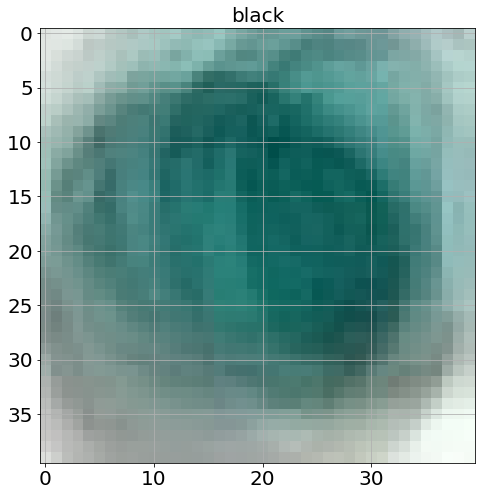

In [41]:
target='black'
target_index=images['target_names'].index(target)
shape_3d=list(shape)+[3]
im=classifier.weights[target_index,:].reshape(shape_3d)
im=im-im.min()
im=im/im.max()
imshow(im)
title(target)

## Backprop

In [63]:
images=image.load_images('/Users/bblais/Desktop/ai373/images/board images/squares')
shape=images.data[0].shape[:2]
data_train=data=image.images_to_vectors(images,verbose=True)  # train on all of them

classifier=BackProp()
timeit(reset=True)
classifier.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

[black]: 58 files found
[red]: 56 files found
[white]: 46 files found
160 vectors of length 4800
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p4795', 'p4796', 'p4797', 'p4798', 'p4799'  (4800 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [181.69375 181.98125 173.61875 ... 182.34375 184.975   176.9125 ]
Median:  [184. 188. 179. ... 184. 188. 181.]
Stddev:  [19.17745971 25.58257998 25.00971608 ... 10.69582096 17.79569822
 17.12869942]
Time Reset
Training time:  0.2035832405090332 seconds 


In [65]:
classifier.weights[0].shape  # input units

(4800, 100)

In [66]:
classifier.weights[1].shape  # hidden units

(100, 3)

### what does it mean to visualize these?

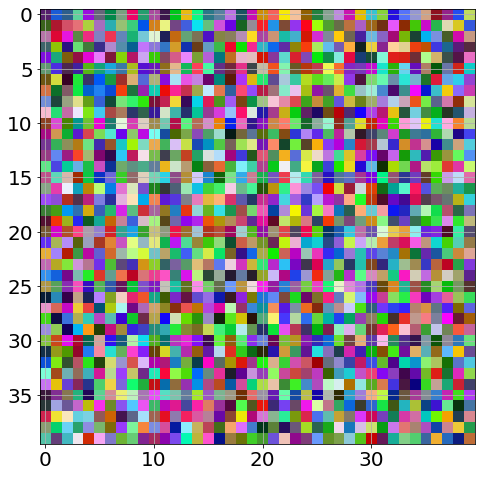

In [80]:
# can't specify target easily
shape_3d=list(shape)+[3]
im=classifier.weights[0][:,2].reshape(shape_3d)
im=im-im.min()
im=im/im.max()
imshow(im)